In [1]:
#Testing the existence of the file
f = open("../cran/cran.all.1400","r")
# if the file mode is set on reading
if f.mode == 'r':
    # print 4 the first 4 lines
    for i in range(0,4):
        print(f.readline())
f.close()

.I 1

.T

experimental investigation of the aerodynamics of a

wing in a slipstream .



In [2]:
f = open("../cran/cran.all.1400","r")
# split each line of the file into a list
data = f.readlines()
# make a copy for rainy day
copy = data
# data

In [3]:
# import regular expression library
import re
data = copy
ptr = []
temp = []
x = ''
for sentence in data:
    # pattern to find either tags [.W, .T, .B, .A except .I with its numbers]
    ptr = re.findall("^\.[A-Z]\s*$", sentence)
    # pattern to find .I cases which are followed by document numbers
    newdoc = re.findall("^\.[A-Z]\s[0-9]+", sentence)
    # the reason of creating 2 patterns is to divide each document into an index of a list
    if ptr:
        x = sentence.replace(ptr[0],"")
    elif newdoc:
        temp.append(x)
        x = ''
    else:
        x += sentence
temp.pop(0)
temp.append(x)
for i in range(len(temp)):
    # remove any non-alphanumeric characters
    temp[i] = re.sub(r'[^A-Za-z0-9\s]',' ',temp[i])

# Tokenizing 
token = []
for i in range(0,len(temp)):
    token.append(temp[i].split())

In [4]:
# Stemming and removing stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
# Using porter-stemmer to stem each non-stopword words
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps_token = token
# repeat the loop 4 times to make sure there is nothing left
for c in range(0,4):
    for i in range(len(ps_token)):
        for j in range(len(ps_token[i])):
            if j == len(ps_token[i]):
                break
            if (ps_token[i][j] in stopwords):
                del ps_token[i][j]
            else:
                ps_token[i][j] = ps.stem(ps_token[i][j])
            if j == len(ps_token[i]):
                break

In [5]:
# counting the number of tokens
sum_ = 0
for i in range(len(token)):
    sum_ += len(token[i])
sum_

132420

In [6]:
# using frequency distribution to get each type's repeats in the dataset
from nltk.book import FreqDist
total_ps_tokens = []
for i in range(0,len(ps_token)):
    for j in range(0,len(ps_token[i])):
        total_ps_tokens.append(ps_token[i][j])
tokenized = FreqDist(total_ps_tokens)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [7]:
len(ps_token)

1400

In [8]:
import pandas as pd
# Total number of types
print(len(tokenized))
# Creating a dataframe with the types and their occurrence in the dataset
final_df = pd.DataFrame(tokenized.items()).set_index(0)[1]
final_df.index[0]

4674


'experi'

<b> Frequency DataFrame

In [9]:
# [[0 for i in range(len(ps_token))] for j in range(len(tokenized))]
import numpy as np
freq = pd.DataFrame(data=0, index=final_df.index ,columns=range(1,1401), dtype=np.int8)

<b>Computing Frequency for each document in dataset and then updating the frequency dataframe

In [10]:
for c in range(len(ps_token)):
    temp_token = FreqDist(ps_token[c])
    for i,j in temp_token.items():
        freq.at[i,c+1] += j

<b>Term Frequency Dataframe

<div class="alert alert-block alert-info">
<b>Note:</b>  Sparse Matrix may be a more optimized approach for big matrices with too many zeros
</div>

In [11]:
tf = pd.DataFrame(data=0, index=(final_df.index) ,columns=range(1,len(ps_token)+1), dtype=np.float16)
tf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4674 entries, experi to ob
Columns: 1400 entries, 1 to 1400
dtypes: float16(1400)
memory usage: 12.7+ MB


$ tf = \frac {T}{L} $
<br>T: is Number of Occurrence for a Given Term
<br>L: Document Length

In [12]:
for row in range(len(tf.index)):
    for col in range(1,len(ps_token)+1):
        # skip 0 values
        if freq.at[freq.index[row],col] > 0:
            tf.at[tf.index[row],col] = float(freq.at[freq.index[row],col] / len(set(ps_token[col-1])))

In [13]:
tf.head()

,1,2,3,4,5,6,7,8,9,10,...,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400
0,,,,,,,,,,,,,,,,,,,,,
experi,0.051727,0.000000,0.0,0.0,0.000000,0.0,0.010635,0.000000,0.000000,0.0,...,0.000000,0.01075,0.000000,0.0,0.000000,0.022217,0.028564,0.0,0.0,0.000000
investig,0.017242,0.014923,0.0,0.0,0.000000,0.0,0.010635,0.016129,0.027527,0.0,...,0.000000,0.00000,0.015381,0.0,0.020828,0.000000,0.000000,0.0,0.0,0.023804
aerodynam,0.017242,0.000000,0.0,0.0,0.037048,0.0,0.000000,0.000000,0.000000,0.0,...,0.011627,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
wing,0.051727,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
slipstream,0.086182,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


<p><b/>Inverse Document Frequency Dataframe</p>

In [14]:
idf = pd.DataFrame(data=0,index=(final_df.index),columns=['IDF','Count'], dtype=np.float16)
idf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4674 entries, experi to ob
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IDF     4674 non-null   float16
 1   Count   4674 non-null   float16
dtypes: float16(2)
memory usage: 214.8+ KB


$$ idf = log_{10}\frac{N}{n}$$
<br><b>N: Number of total documents
<br><b>n: Number of documents that the given term exists in them

In [15]:
from math import log10
for row in range(len(tf.index)):
    c = 0
    for col in range(1,len(ps_token)+1):
        if tf.at[tf.index[row],col] > 0:
            c+=1
    if c > 0:
        idf.at[idf.index[row],'IDF'] = log10(1400 / c)
        idf.at[idf.index[row],'Count'] = c

In [16]:
idf.head()

,IDF,Count
0,,
experi,0.533203,410.0
investig,0.588379,361.0
aerodynam,0.893066,179.0
wing,0.791992,226.0
slipstream,1.969727,15.0


<b> Testing the gained results for one query

In [17]:
qry = 'has anyone formally determined the influence of joule heating produced by the induced current in magnetohydrodynamic free convection flows under general conditions .'
akyc = qry.split()
for i in range(0,2):
    for i in akyc:
        if i in stopwords:
            akyc.remove(i)
akyc.pop(len(akyc)-1)
for i in range(len(akyc)):
    akyc[i] = ps.stem(akyc[i])

print(akyc)

['anyon', 'formal', 'determin', 'influenc', 'joul', 'heat', 'produc', 'induc', 'current', 'magnetohydrodynam', 'free', 'convect', 'flow', 'gener', 'condit']


In [18]:
# 0 for i in range(len(ps_token))
tlst = pd.DataFrame(data=0,index=range(1, len(ps_token)+1),columns=['Query1'],dtype=np.float16)
tlst.size

1400

In [19]:
for j in range(1, len(ps_token)+1):
    sum_ = 0.0
    for i in akyc:
        if i in tf.index:
            if tf.loc[i][j] != 0:
                sum_ += tf.at[i,j] * idf.at[i,'IDF']
    tlst.at[j,'Query1'] = sum_
tlst.head()
print(idf.at[idf.index[0],'IDF'],tf.at[tf.index[0],1])
print(idf.index[0],tf.index[0])

0.533 0.05173
experi experi


In [20]:
tlst = tlst.sort_values(by=['Query1'],ascending=False)
print(tlst.at[27,'Query1'])
print(tlst.head(5))
for i in akyc:
    if i in ps_token[577]:
        print(i)    
for i in akyc:
    if i in idf.index:
        print(tf.at[i,578], end='\t')
print()
for i in akyc:
    print(i, end='\t')
print()
for i in akyc:
    if i in idf.index:
        print(idf.at[i,'IDF'], end='\t')
# print(tf_idf.at['high',578],tf_idf.at['speed',578])

0.03754
       Query1
500  0.484863
407  0.333008
268  0.327148
270  0.279785
88   0.277344
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
anyon	formal	determin	influenc	joul	heat	produc	induc	current	magnetohydrodynam	free	convect	flow	gener	condit	
2.447	0.669	1.142	3.146	0.6616	1.254	1.283	1.641	1.748	0.8096	1.493	0.284	0.6274	0.6235	

<b>Importing relevance-judgements

In [21]:
f = open("relevant","r")
relevant = []
raw_file = f.readlines()
f.close()
temp0 = temp1 = raw_file[0].split()
tmp = []
for i in raw_file:
    if temp0[0] == temp1[0]:
        tmp.append(int(temp1[1]))
    else:
        relevant.append(tmp)
        temp0 = temp1
        tmp = []
    temp1 = i.split()
relevant.append(tmp)
relevant[0].remove(27)

In [22]:
for i in range(0,5):
    if tlst.index[i] in relevant[9]:
        print(tlst.index[i],tlst.at[tlst.index[i],'Query1'])

500 0.4849
407 0.333
268 0.3271
270 0.2798
88 0.2773


<b> Importing cran.qry

In [23]:
f = open("../cran/cran.qry","r")
raw_file = f.read()
raw_file = re.sub(r'[\n]+',' ',raw_file)
raw_file = re.sub(r'\.[W]|[0-9]+',"",raw_file)
qr = raw_file.split('.I')
qr.pop(0)
for i in range(len(qr)):
    qr[i] = re.sub(r'[^A-Za-z0-9\s]',' ',qr[i])
print(len(qr))
qr[1]

225


'   what are the structural and aeroelastic problems associated with flight of high speed aircraft   '

In [24]:
sqr = []
for i in range(len(qr)):
    sqr.append(qr[i].split())
sqr[0]

['what',
 'similarity',
 'laws',
 'must',
 'be',
 'obeyed',
 'when',
 'constructing',
 'aeroelastic',
 'models',
 'of',
 'heated',
 'high',
 'speed',
 'aircraft']

<b>Cleaning the text

In [25]:
# All the stopwords plus the dots for ending sentences are going to be removed
for c in range(0,4):
    for i in range(len(sqr)):
        for j in range(len(sqr[i])):
            if j == len(sqr[i]):
                break
            if (sqr[i][j] in stopwords) or (sqr[i][j] == '.'):
                del sqr[i][j]
            else:
                sqr[i][j] = ps.stem(sqr[i][j])
            if j == len(sqr[i]):
                break

In [26]:
sqr[0]

['similar',
 'law',
 'must',
 'obey',
 'construct',
 'aeroelast',
 'model',
 'heat',
 'high',
 'speed',
 'aircraft']

In [27]:
lst = []
for i in range(len(sqr)):
    lst.append(pd.DataFrame(data=0,index=range(1, len(ps_token)+1),columns=[i+1],dtype=np.float16))

In [28]:
for i in range(len(lst)):
    for j in range(1, len(ps_token)+1):
        sum_ = 0.0
        for k in sqr[i]:
            if k in tf.index:
                if tf.loc[k][j] != 0:
                    sum_ += tf.at[k,j] * idf.at[k,'IDF']
        lst[i].at[j,i+1] = sum_

In [29]:
for i in range(len(lst)):
    lst[i] = lst[i].sort_values(by=[i+1],ascending=False)

<div class="alert alert-block alert-info">
    <center><h3>Results in details</h3></center>
</div>

Just change the `lst` index to see the relevent results for each query

In [80]:
lst[0].head(10)

,1
51,0.501465
879,0.245850
12,0.229614
359,0.223755
878,0.201782
874,0.200684
817,0.197266
184,0.193726
13,0.181885
486,0.180298


Increse the `spread` to check in wider range of relevant docs.
<br>`qn` ranges between `0-9`

In [84]:
spread = 20
qn = 7 ## query number
pc = 0 ## positive matches
for i in np.array(lst[qn].head(spread).index):
    if i in relevant[qn]:
        pc+=1
print(pc)

1


<h3>Validating Queries (just in case)

In [31]:
_10qry = []
for i in range(len(qr)):
    if 'is it possible to find' in qr[i]:
        _10qry.append(i)
    elif 'how can the aerodynamic ' in qr[i]:
        _10qry.append(i)
    elif 'what is the basic ' in qr[i]:
        _10qry.append(i)
    elif 'papers on shock sound' in qr[i]:
        _10qry.append(i)
    elif 'material properties ' in qr[i]:
        _10qry.append(i)
    elif 'can the transverse ' in qr[i]:
        _10qry.append(i)
    elif 'can the three dimensional ' in qr[i]:
        _10qry.append(i)
    elif 'are experimental pressure ' in qr[i]:
        _10qry.append(i)
    elif 'does there exist a good basic treatment' in qr[i]:
        _10qry.append(i)
    elif 'has anyone formally ' in qr[i]:
        _10qry.append(i)
len(_10qry)

10

================ TF-IDF ================


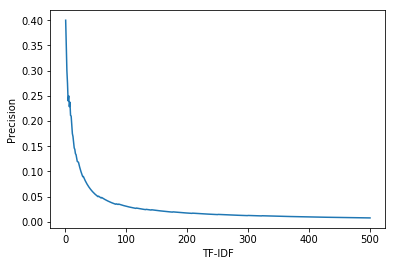

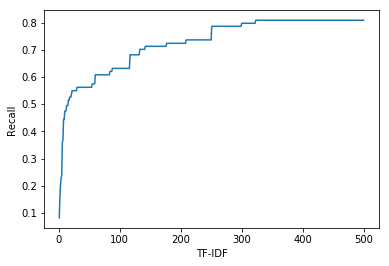

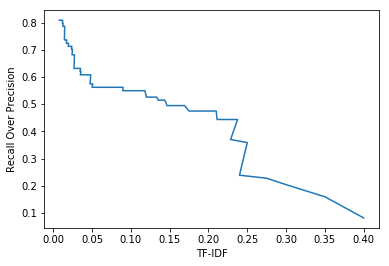

In [87]:
import matplotlib.pyplot as plt
avg_recall = []
avg_precision = []
print("================ TF-IDF ================")
# from 10 documents to 500 documents calculate precision and recall
for N in range(1,501):
    precision = []
    recall = []
    # in each 10 queries
    for i in _10qry:
        c = 0
        for j in range(N):
            if lst[i].index[j] in relevant[i%len(_10qry)]:
                c+=1
        
        precision.append(c/N)
        recall.append(c/len(relevant[i%len(_10qry)]))
    # calculating average recall and precision for each step
    avg_precision.append(sum(precision)/len(precision))
    avg_recall.append(sum(recall)/len(recall))
# precision plot
plt.plot(np.arange(1, 501),avg_precision)
plt.ylabel('Precision')
plt.xlabel('TF-IDF')
plt.savefig('precision.png')
plt.show()

# recall plot
plt.plot(np.arange(1, 501),avg_recall)
plt.ylabel('Recall')
plt.xlabel('TF-IDF')
plt.savefig('recall.png')
plt.show()

# recall over precision plot
plt.plot(avg_precision,avg_recall)
plt.ylabel('Recall Over Precision')
plt.xlabel('TF-IDF')
plt.savefig('recall_over_precision.png')
plt.show()

================ TF-IDF ================


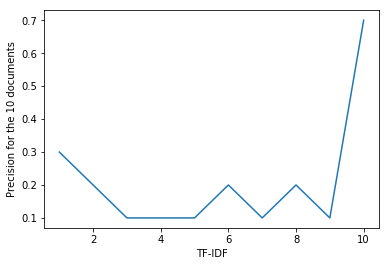

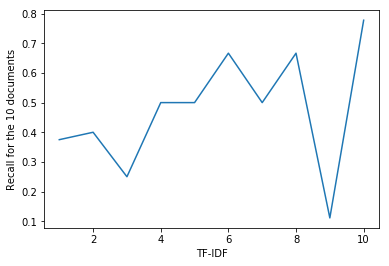

In [33]:
import matplotlib.pyplot as plt
precision = []
recall = []
N = 10
print("================ TF-IDF ================")
for i in _10qry:
    #print(lst[i].head(N))
    c = 0
    #print("== RELEVANT ==")
    for j in range(N):
        if lst[i].index[j] in relevant[i%len(_10qry)]:
            #print(lst[i].index[j], end=' ')
            c+=1
    #print("\n",relevant[i%len(_10qry)])
    #print("Query: ",(i%len(_10qry))+1)
    #print("Precision: ", '{:.3f}'.format(c/N))
    #print("Recall: ", '{:.3f}'.format(c/len(relevant[i%len(_10qry)])))
    precision.append(c/N)
    recall.append(c/len(relevant[i%len(_10qry)]))
    #print("==============")
plt.plot(range(1,len(_10qry)+1),precision)
plt.ylabel('Precision for the {:} documents'.format(N))
plt.xlabel('TF-IDF')
plt.show()
plt.plot(range(1,len(_10qry)+1),recall)
plt.ylabel('Recall for the {:} documents'.format(N))
plt.xlabel('TF-IDF')
plt.show()

================ TF-IDF ================


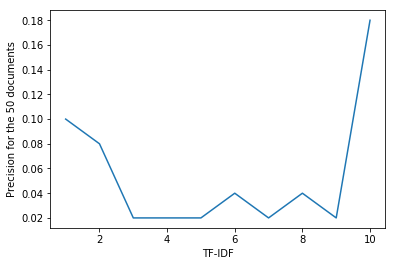

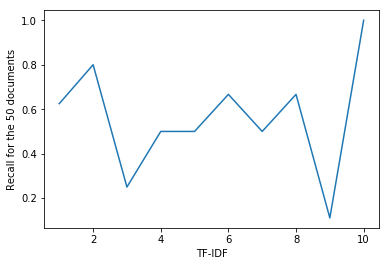

In [34]:
N = 50
precision = []
recall = []
print("================ TF-IDF ================")
for i in _10qry:
    #print(lst[i].head(N))
    c = 0
    #print("== RELEVANT ==")
    for j in range(N):
        if lst[i].index[j] in relevant[i%len(_10qry)]:
            #print(lst[i].index[j], end=' ')
            c+=1
    #print("\n",relevant[i%len(_10qry)])
    #print("Query: ",(i%len(_10qry))+1)
    #print("Precision: ", '{:.3f}'.format(c/N))
    #print("Recall: ", '{:.3f}'.format(c/len(relevant[i%len(_10qry)])))
    precision.append(c/N)
    recall.append(c/len(relevant[i%len(_10qry)]))
    #print("==============")
plt.plot(range(1,len(_10qry)+1),precision)
plt.ylabel('Precision for the {:} documents'.format(N))
plt.xlabel('TF-IDF')
plt.show()
plt.plot(range(1,len(_10qry)+1),recall)
plt.ylabel('Recall for the {:} documents'.format(N))
plt.xlabel('TF-IDF')
plt.show()

================ TF-IDF ================


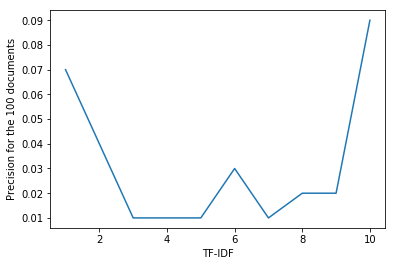

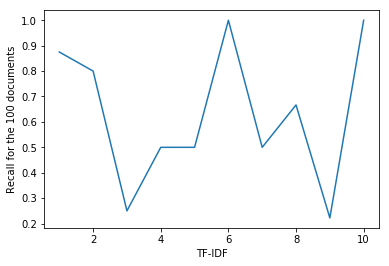

In [35]:
N = 100
precision = []
recall = []
print("================ TF-IDF ================")
for i in _10qry:
    #print(lst[i].head(N))
    c = 0
    #print("== RELEVANT ==")
    for j in range(N):
        if lst[i].index[j] in relevant[i%len(_10qry)]:
            #print(lst[i].index[j], end=' ')
            c+=1
    #print("\n",relevant[i%len(_10qry)])
    #print("Query: ",(i%len(_10qry))+1)
    #print("Precision: ", '{:.3f}'.format(c/N))
    #print("Recall: ", '{:.3f}'.format(c/len(relevant[i%len(_10qry)])))
    precision.append(c/N)
    recall.append(c/len(relevant[i%len(_10qry)]))
    #print("==============")
plt.plot(range(1,len(_10qry)+1),precision)
plt.ylabel('Precision for the {:} documents'.format(N))
plt.xlabel('TF-IDF')
plt.show()
plt.plot(range(1,len(_10qry)+1),recall)
plt.ylabel('Recall for the {:} documents'.format(N))
plt.xlabel('TF-IDF')
plt.show()

================ TF-IDF ================


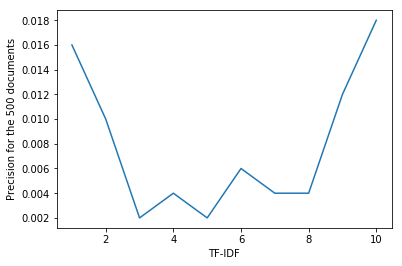

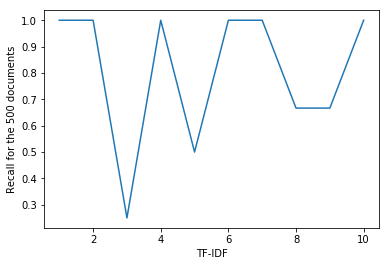

In [36]:
N = 500
precision = []
recall = []
print("================ TF-IDF ================")
for i in _10qry:
    #print(lst[i].head(N))
    c = 0
    #print("== RELEVANT ==")
    for j in range(N):
        if lst[i].index[j] in relevant[i%len(_10qry)]:
            #print(lst[i].index[j], end=' ')
            c+=1
    #print("\n",relevant[i%len(_10qry)])
    #print("Query: ",(i%len(_10qry))+1)
    #print("Precision: ", '{:.3f}'.format(c/N))
    #print("Recall: ", '{:.3f}'.format(c/len(relevant[i%len(_10qry)])))
    #print("==============")
    precision.append(c/N)
    recall.append(c/len(relevant[i%len(_10qry)]))
plt.plot(range(1,len(_10qry)+1),precision)
plt.ylabel('Precision for the {:} documents'.format(N))
plt.xlabel('TF-IDF')
plt.show()
plt.plot(range(1,len(_10qry)+1),recall)
plt.ylabel('Recall for the {:} documents'.format(N))
plt.xlabel('TF-IDF')
plt.show()